In [1]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np


In [47]:
# %%time
# #동물 병원 정보 크롤링
# page_num = 503
# data = []
# for page in range(1,page_num+1):
#     target_url = 'https://www.animal.go.kr/front/awtis/shop/hospitalList.do?totalCount=5021&pageSize=10&menuNo=6000000002&&page=' + str(page)
#     html = urllib.request.urlopen(target_url).read()
#     soup = BeautifulSoup(html, 'html.parser')

#     # 테이블이 하나여서 조건없이 테이블 추출
#     table = soup.find('table')

#     trs = table.find_all('tr')
#     for idx, tr in enumerate(trs): # enumerate를 사용하면 해당 값의 인덱스를 알 수 있다.
#         if idx > 0:
#             tds = tr.find_all('td')
#             # 앞뒤 여백이 있어 strip()을 사용했다.
#             description = tds[1].text.strip()
#             solved_num = tds[2].text.strip()
#             loc = tds[3].text.strip()
#             data.append([description, solved_num,loc])
#     print(page)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [2]:
df_hospital_raw = pd.read_csv('hospital_raw.csv')
# df_hospital_raw = pd.DataFrame(data = data, columns = ['name','phone','location'] )
df_hospital = df_hospital_raw.copy()
df_hospital.head()

,Unnamed: 0,name,phone,location
0,0,(주)가나이십사시동물병원,402-4061,경기도 안산시 단원구 고잔동
1,1,(주)누리종합동물병원,033-761-0167,강원도 원주시 단구동
2,2,(주)다솜동물메디컬센터,051-632-7580,부산광역시 남구 문현동
3,3,(주)대경동물병원,NaN,경상북도 구미시 선산읍 화조리
4,4,(주)돼지와건강,070-4256-8656,충청남도 홍성군 홍성읍 옥암리


## 데이터 전처리

In [3]:
#null값 확인
df_hospital.isna().sum()

Unnamed: 0       0
name             0
phone         1019
location        98
dtype: int64

In [4]:
# 결측치 확인
df_hospital['location'].value_counts()

서울특별시 양천구 목동        21
경기도 부천시 중동          21
서울특별시 노원구 상계동       18
서울특별시 강서구 화곡동       17
인천광역시 연수구 송도동       17
                    ..
경상북도 영덕군 영덕읍 화수리     1
경기도 포천시 내촌면 내리       1
경기도 부천시 삼정동          1
경상북도 김천시 지좌동         1
충청남도 부여군 규암면 외리      1
Name: location, Length: 2055, dtype: int64

In [5]:
# 위치 결측치 제거
df_hospital = df_hospital.loc[df_hospital['location']!='']
df_hospital['location'].value_counts()

서울특별시 양천구 목동        21
경기도 부천시 중동          21
서울특별시 노원구 상계동       18
서울특별시 강서구 화곡동       17
인천광역시 연수구 송도동       17
                    ..
경상북도 영덕군 영덕읍 화수리     1
경기도 포천시 내촌면 내리       1
경기도 부천시 삼정동          1
경상북도 김천시 지좌동         1
충청남도 부여군 규암면 외리      1
Name: location, Length: 2055, dtype: int64

In [6]:
df_hospital.loc[df_hospital['location'].apply(lambda row : len(row.split())) == 2]

AttributeError: 'float' object has no attribute 'split'

In [7]:
# 지역데이터 분리
df_hospital['location_0'] = df_hospital['location'].apply(lambda row : row.split()[0])
df_hospital['location_1'] = df_hospital['location'].apply(lambda row : row.split()[1])
# df_hospital['location_2'] = df_hospital['location'].apply(lambda row : row.split()[2])
df_hospital

AttributeError: 'float' object has no attribute 'split'

In [10]:
df_hospital['location_1'].apply(lambda row : len(row)).value_counts()

3    4185
2     413
4     310
6      16
Name: location_1, dtype: int64

In [11]:
df_hospital.loc[df_hospital['location_1'].apply(lambda row : len(row))==6,'location_1']

225     청주시흥덕구
226     청주시흥덕구
645     청주시흥덕구
1116    천안시동남구
1228    청주시상당구
1557    청주시흥덕구
2009    청주시흥덕구
2332    청주시상당구
3055    청주시흥덕구
3115    청주시상당구
3486    청주시상당구
3705    청주시상당구
4038    청주시상당구
4103    청주시흥덕구
4134    청주시흥덕구
4577    청주시상당구
Name: location_1, dtype: object

In [12]:
# oo시 oo구 로 된 데이터  -> oo시 변경
df_hospital.loc[df_hospital['location_1'].apply(lambda row : len(row))==6,
                'location_1'] = df_hospital.loc[df_hospital['location_1'].apply(lambda row : len(row))==6,
                'location_1'].apply(lambda row : row[:3])

In [13]:
df_hospital.loc[df_hospital['location_1'].apply(lambda row : len(row))==6,'location_1'].value_counts()

Series([], Name: location_1, dtype: int64)

In [14]:
df_hospital['location_1'].apply(lambda row : len(row)).value_counts()

3    4201
2     413
4     310
Name: location_1, dtype: int64

## 시각화

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 기존에 설치되어있는 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumSquare_ac'

In [16]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
sorted(font_list)

['Agency FB',
 'Agency FB',
 'Algerian',
 'Ami R',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial Rounded MT Bold',
 'Bahnschrift',
 'Baskerville Old Face',
 'Batang',
 'Bauhaus 93',
 'Bell MT',
 'Bell MT',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'Blackadder ITC',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Book Antiqua',
 'Book Antiqua',
 'Book Antiqua',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookman Old Style',
 'Bookman Old Style',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'Brush Script MT',
 'Calibri',
 'Calibri',
 'Calibri',
 'Calibri',
 'Calibri',
 'Calibri',
 'Californian FB',
 'Californian FB',
 'Californian FB',
 'Calisto MT',
 'Calisto MT',
 'Calisto MT',
 'Calisto MT',
 'Cambria',
 'Cambria',
 'Cam

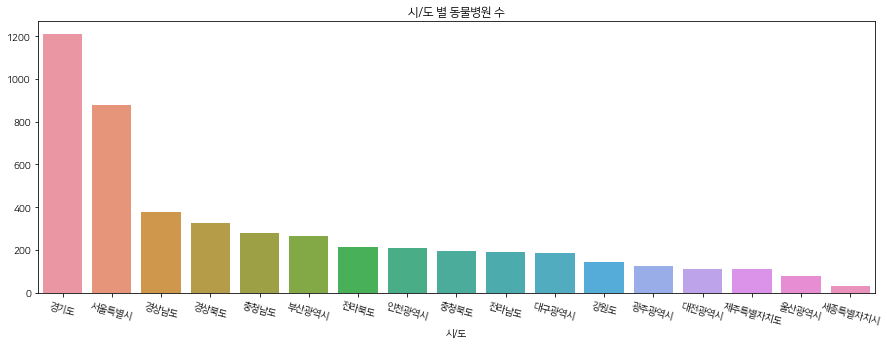

In [17]:
plt.figure(figsize = (15,5))
fig = sns.countplot(data = df_hospital, x = 'location_0',order = df_hospital['location_0'].value_counts().index)
plt.xlabel('시/도')
plt.xticks(rotation = -15)
plt.ylabel('')
plt.title('시/도 별 동물병원 수')
plt.show(fig)

In [18]:
df_bubble = df_hospital['location_0'].value_counts()
df_bubble

경기도        1212
서울특별시       878
경상남도        379
경상북도        326
충청남도        277
부산광역시       264
전라북도        212
인천광역시       210
충청북도        196
전라남도        188
대구광역시       184
강원도         145
광주광역시       123
대전광역시       112
제주특별자치도     112
울산광역시        77
세종특별자치시      29
Name: location_0, dtype: int64

In [19]:
import json
state_geo = 'TL_SCCO_SIG_WGS84.json'
json_data=open(state_geo).read()
jsonResult = json.loads(json_data)

In [20]:
# 중앙위치 계산
def center_calc(points_df):
    x = points_df.x
    y = points_df.y

    X = (max(x)+min(x))/2.
    Y = (max(y)+min(y))/2.

    return X, Y

# 다중 Array 구조 이중으로 변환
def points_array(points):

    final_points = []

    for x in range(0, len(points)):

        if len(points[x]) == 2:
            final_points.append(points[x])
        else:
            target = points[x]
            for y in range(0, len(target)):
                final_points.append(target[y])

    return final_points

In [21]:
center_locations = pd.DataFrame()
codes = []
names = []
x_list = []
y_list = []
for x in range(0, len(jsonResult['features'])):
    code = jsonResult['features'][x]['properties']['SIG_CD']
    name = jsonResult['features'][x]['properties']['SIG_KOR_NM']
    # 중앙값 생성
    points = jsonResult['features'][x]['geometry']['coordinates'][0]
    points = points_array(points)
    points_df = pd.DataFrame(points)
    points_df.columns = ['x','y']
    X, Y = center_calc(points_df)

    # 결과
    codes.append(code)
    names.append(name)
    x_list.append(X)
    y_list.append(Y)

# 데이터 프레임 생성
center_locations['CODE'] = codes
center_locations['NAME'] = names
center_locations['X'] = x_list
center_locations['Y'] = y_list

In [22]:
center_locations['NAME'].apply(lambda x : len(x)).value_counts()

3    182
2     26
7     17
6     14
4      9
9      2
Name: NAME, dtype: int64

In [23]:
center_locations.loc[center_locations['NAME'].apply(lambda x : len(x.split())) == 2]

,CODE,NAME,X,Y
75,41111,수원시 장안구,127.0005,37.3185
76,41113,수원시 권선구,126.9845,37.2640
77,41115,수원시 팔달구,127.0105,37.2750
78,41117,수원시 영통구,127.0605,37.2770
79,41131,성남시 수정구,127.1090,37.4360
80,41133,성남시 중원구,127.1565,37.4400
81,41135,성남시 분당구,127.1025,37.3750
135,43111,청주시 상당구,127.6075,36.5690
136,43112,청주시 서원구,127.4370,36.5475
137,43113,청주시 흥덕구,127.3790,36.6435


In [27]:
center_locations['CODE'] = center_locations['CODE'].astype('int')

In [25]:
df_code = pd.read_csv("code.txt", sep = '\t', encoding = 'cp949') 
df_code['법정동코드'] = df_code['법정동코드'].apply(lambda x : x//100000 if x%100000 == 0 else 0) 
# df_code['법정동코드'] = df_code['법정동코드'].apply(lambda x : x//100000) 
# df_code =df_code.loc[df_code['폐지여부'] == '존재']
df_code = df_code.rename(columns = {'법정동코드' : 'CODE'})
df_code = df_code.drop(columns = '폐지여부')
df_code

,CODE,법정동명
0,11000,서울특별시
1,11110,서울특별시 종로구
2,0,서울특별시 종로구 청운동
3,0,서울특별시 종로구 신교동
4,0,서울특별시 종로구 궁정동
...,...,...
46287,0,제주특별자치도 서귀포시 표선면 하천리
46288,0,제주특별자치도 서귀포시 표선면 성읍리
46289,0,제주특별자치도 서귀포시 표선면 가시리
46290,0,제주특별자치도 서귀포시 표선면 세화리


In [28]:
df_location = pd.merge(right = df_code,left = center_locations, on = 'CODE', how = 'left' )
# df_location = df_location.drop(columns = 'NAME')
df_location = df_location.rename(columns = { '법정동명' : 'loc'})
df_location.loc[df_location['CODE'] == 36110,'loc'] = '세종특별자치시 세종특별자치시'
df_location['loc_0'] = df_location['loc'].apply(lambda x : str(x).split()[0])
df_location['loc_1'] = df_location['loc'].apply(lambda x : ' '.join(str(x).split()[1:]))
df_location['X'] = df_location['X'].astype('float')
df_location['Y'] = df_location['Y'].astype('float')
df_location


,CODE,NAME,X,Y,loc,loc_0,loc_1
0,11110,종로구,126.9860,37.5990,서울특별시 종로구,서울특별시,종로구
1,11140,중구,126.9945,37.5580,서울특별시 중구,서울특별시,중구
2,11170,용산구,126.9815,37.5315,서울특별시 용산구,서울특별시,용산구
3,11200,성동구,127.0415,37.5505,서울특별시 성동구,서울특별시,성동구
4,11215,광진구,127.0855,37.5485,서울특별시 광진구,서울특별시,광진구
...,...,...,...,...,...,...,...
245,48870,함양군,127.7315,35.5435,경상남도 함양군,경상남도,함양군
246,48880,거창군,127.8870,35.7120,경상남도 거창군,경상남도,거창군
247,48890,합천군,128.1670,35.6000,경상남도 합천군,경상남도,합천군
248,50110,제주시,126.2270,33.4085,제주특별자치도 제주시,제주특별자치도,제주시


In [29]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CODE    250 non-null    int32  
 1   NAME    250 non-null    object 
 2   X       250 non-null    float64
 3   Y       250 non-null    float64
 4   loc     250 non-null    object 
 5   loc_0   250 non-null    object 
 6   loc_1   250 non-null    object 
dtypes: float64(2), int32(1), object(4)
memory usage: 14.6+ KB


In [30]:
df_loc_sido = df_location[['X','Y','loc_0']].groupby(['loc_0']).mean()
df_loc_sido

,X,Y
loc_0,,
강원도,128.361472,37.747500
경기도,127.034774,37.457595
경상남도,128.371023,35.221750
경상북도,128.819750,36.337854
광주광역시,126.866900,35.142000
대구광역시,128.586062,35.851063
대전광역시,127.404400,36.332800
부산광역시,129.055813,35.156312
서울특별시,126.990080,37.554540


In [31]:
df_hospital[['location_0','location_1']].apply(lambda row : row['location_0'] + ' '+ row['location_1'], axis = 1)
df_hospital['loc_2'] = df_hospital[['location_0','location_1']].apply(lambda row : row['location_0'] + ' '+ row['location_1'], axis = 1)
df_hospital

,name,phone,location,location_0,location_1,loc_2
0,(주)가나이십사시동물병원,402-4061,경기도 안산시 단원구 고잔동,경기도,안산시,경기도 안산시
1,(주)누리종합동물병원,033-761-0167,강원도 원주시 단구동,강원도,원주시,강원도 원주시
2,(주)다솜동물메디컬센터,051-632-7580,부산광역시 남구 문현동,부산광역시,남구,부산광역시 남구
3,(주)대경동물병원,,경상북도 구미시 선산읍 화조리,경상북도,구미시,경상북도 구미시
4,(주)돼지와건강,070-4256-8656,충청남도 홍성군 홍성읍 옥암리,충청남도,홍성군,충청남도 홍성군
...,...,...,...,...,...,...
5017,힐스타동물병원,02-445-5022,서울특별시 강남구 자곡동,서울특별시,강남구,서울특별시 강남구
5018,힘찬동물병원,,부산광역시 부산진구 가야동,부산광역시,부산진구,부산광역시 부산진구
5019,힘참동물병원,055-388-7975,경상남도 양산시 물금읍 범어리,경상남도,양산시,경상남도 양산시
5020,農和동물병원(산업동물출장진료전문),011-585-1703,경상남도 김해시 봉황동,경상남도,김해시,경상남도 김해시


In [32]:
import folium
A = df_hospital.groupby(['loc_2']).count().reset_index()
data = pd.merge(left = A, right = df_location, right_on = 'loc', left_on = 'loc_2', how = 'inner')
# df_location
# data

# Make an empty map
m = folium.Map(location=[36,128], tiles="OpenStreetMap", zoom_start=7.2)


for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['Y'], data.iloc[i]['X']],
      popup=data.iloc[i]['loc_2'],
      radius=float(data.iloc[i]['name'])*50,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

# Show the map again
m


In [33]:
# df_location.loc[df_location['loc_0']=='경기도']
df_location.loc[df_location['loc_1'].apply(lambda x : len(x.split()) == 2)]

,CODE,NAME,X,Y,loc,loc_0,loc_1
75,41111,수원시 장안구,127.0005,37.3185,경기도 수원시 장안구,경기도,수원시 장안구
76,41113,수원시 권선구,126.9845,37.2640,경기도 수원시 권선구,경기도,수원시 권선구
77,41115,수원시 팔달구,127.0105,37.2750,경기도 수원시 팔달구,경기도,수원시 팔달구
78,41117,수원시 영통구,127.0605,37.2770,경기도 수원시 영통구,경기도,수원시 영통구
79,41131,성남시 수정구,127.1090,37.4360,경기도 성남시 수정구,경기도,성남시 수정구
80,41133,성남시 중원구,127.1565,37.4400,경기도 성남시 중원구,경기도,성남시 중원구
81,41135,성남시 분당구,127.1025,37.3750,경기도 성남시 분당구,경기도,성남시 분당구
83,41171,안양시만안구,126.9095,37.4045,경기도 안양시 만안구,경기도,안양시 만안구
84,41173,안양시동안구,126.9550,37.4015,경기도 안양시 동안구,경기도,안양시 동안구
89,41271,안산시상록구,126.8775,37.3225,경기도 안산시 상록구,경기도,안산시 상록구


In [34]:
df_hospital['loc_2'].value_counts()

경상남도 창원시       130
충청북도 청주시       112
경기도 성남시        110
경기도 용인시        107
경기도 고양시        106
              ... 
세종특별자치시 전의면      1
세종특별자치시 한솔동      1
경상남도 마산시         1
경상북도 울릉군         1
전라남도 신안군         1
Name: loc_2, Length: 247, dtype: int64

In [35]:
import folium

In [36]:
df_hospital[['name','location_0']].groupby(['location_0']).count()
A = df_loc_sido.reset_index()
B = df_hospital[['name','location_0']].groupby(['location_0']).count().reset_index()
data = pd.merge(left = A, right = B, left_on = 'loc_0', right_on = 'location_0')
data

,loc_0,X,Y,location_0,name
0,강원도,128.361472,37.747500,강원도,145
1,경기도,127.034774,37.457595,경기도,1212
2,경상남도,128.371023,35.221750,경상남도,379
3,경상북도,128.819750,36.337854,경상북도,326
4,광주광역시,126.866900,35.142000,광주광역시,123
5,대구광역시,128.586062,35.851063,대구광역시,184
6,대전광역시,127.404400,36.332800,대전광역시,112
7,부산광역시,129.055813,35.156312,부산광역시,264
8,서울특별시,126.990080,37.554540,서울특별시,878
9,세종특별자치시,127.269500,36.570500,세종특별자치시,29


In [37]:
# Make an empty map
m = folium.Map(location=[36,128], tiles="OpenStreetMap", zoom_start=7.2)


for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['Y'], data.iloc[i]['X']],
      popup=data.iloc[i]['loc_0'],
      radius=float(data.iloc[i]['name'])*50,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

# Show the map again
m

In [38]:
A = df_hospital.groupby(['loc_2']).count().reset_index()
data = pd.merge(left = A, right = df_location, right_on = 'loc', left_on = 'loc_2', how = 'inner')
# df_location
# data

# Make an empty map
m = folium.Map(location=[36,128], tiles="cartodbpositron", zoom_start=7.2)
data['scale'] = (data['name'] - data['name'].min())/(data['name'].max() - data['name'].min())

for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['Y'], data.iloc[i]['X']],
      label=(data.iloc[i]['loc_2'],data.iloc[i]['name']),
      radius=float(data.iloc[i]['scale'])*5000,
      color='#1377ff',
      fill=True,
      fill_color='#1377ff'
   ).add_child(folium.Popup(data.iloc[i]['loc_2']+' : '+str(data.iloc[i]['name']) + '개',max_width=500)).add_to(m)

# Show the map again
m

In [39]:
A.describe()

,name,phone,location,location_0,location_1
count,247.000000,247.000000,247.000000,247.000000,247.000000
mean,19.935223,19.935223,19.935223,19.935223,19.935223
std,21.226514,21.226514,21.226514,21.226514,21.226514
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.500000,6.500000,6.500000,6.500000,6.500000
50%,13.000000,13.000000,13.000000,13.000000,13.000000
75%,28.000000,28.000000,28.000000,28.000000,28.000000
max,130.000000,130.000000,130.000000,130.000000,130.000000


In [40]:
data.rename(columns = {'name' : 'hospitals'})

,loc_2,hospitals,phone,location,location_0,location_1,CODE,NAME,X,Y,loc,loc_0,loc_1,scale
0,강원도 강릉시,15,15,15,15,15,42150,강릉시,128.8265,37.7105,강원도 강릉시,강원도,강릉시,0.160920
1,강원도 고성군,3,3,3,3,3,42820,고성군,128.4250,38.3890,강원도 고성군,강원도,고성군,0.022989
2,강원도 동해시,4,4,4,4,4,42170,동해시,129.0580,37.5160,강원도 동해시,강원도,동해시,0.034483
3,강원도 삼척시,4,4,4,4,4,42230,삼척시,129.1040,37.2580,강원도 삼척시,강원도,삼척시,0.034483
4,강원도 속초시,8,8,8,8,8,42210,속초시,128.5180,38.1740,강원도 속초시,강원도,속초시,0.080460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,충청북도 음성군,12,12,12,12,12,43770,음성군,127.6215,36.9940,충청북도 음성군,충청북도,음성군,0.126437
212,충청북도 제천시,9,9,9,9,9,43150,제천시,128.1275,37.0350,충청북도 제천시,충청북도,제천시,0.091954
213,충청북도 증평군,4,4,4,4,4,43745,증평군,127.6005,36.7805,충청북도 증평군,충청북도,증평군,0.034483
214,충청북도 진천군,8,8,8,8,8,43750,진천군,127.4375,36.8805,충청북도 진천군,충청북도,진천군,0.080460


In [14]:
import plotly.express as px
df = data.rename(columns = {'name' : 'hospitals'})
fig = px.scatter_mapbox(df, lat="Y", lon="X", size="hospitals", hover_name = 'loc_2', size_max=20, zoom=5.5,
                  mapbox_style="carto-positron",
                       center={"lat": 36, "lon": 128},width=600, height=700)
fig.show()

In [42]:
data.to_csv("hospital.csv", mode = 'w')

In [10]:
data = pd.read_csv("hospital.csv")
data

,Unnamed: 0,loc_2,name,phone,location,location_0,location_1,CODE,NAME,X,Y,loc,loc_0,loc_1,scale
0,0,강원도 강릉시,15,15,15,15,15,42150,강릉시,128.8265,37.7105,강원도 강릉시,강원도,강릉시,0.160920
1,1,강원도 고성군,3,3,3,3,3,42820,고성군,128.4250,38.3890,강원도 고성군,강원도,고성군,0.022989
2,2,강원도 동해시,4,4,4,4,4,42170,동해시,129.0580,37.5160,강원도 동해시,강원도,동해시,0.034483
3,3,강원도 삼척시,4,4,4,4,4,42230,삼척시,129.1040,37.2580,강원도 삼척시,강원도,삼척시,0.034483
4,4,강원도 속초시,8,8,8,8,8,42210,속초시,128.5180,38.1740,강원도 속초시,강원도,속초시,0.080460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,충청북도 음성군,12,12,12,12,12,43770,음성군,127.6215,36.9940,충청북도 음성군,충청북도,음성군,0.126437
212,212,충청북도 제천시,9,9,9,9,9,43150,제천시,128.1275,37.0350,충청북도 제천시,충청북도,제천시,0.091954
213,213,충청북도 증평군,4,4,4,4,4,43745,증평군,127.6005,36.7805,충청북도 증평군,충청북도,증평군,0.034483
214,214,충청북도 진천군,8,8,8,8,8,43750,진천군,127.4375,36.8805,충청북도 진천군,충청북도,진천군,0.080460


In [ ]:
data[['name','loc_0']].groupby('loc')